# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [113]:
df = pd.read_csv("../data/states_edu.csv")
df.head

<bound method NDFrame.head of              PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
0           1992_ALABAMA        ALABAMA  1992     NaN      2678885.0   
1            1992_ALASKA         ALASKA  1992     NaN      1049591.0   
2           1992_ARIZONA        ARIZONA  1992     NaN      3258079.0   
3          1992_ARKANSAS       ARKANSAS  1992     NaN      1711959.0   
4        1992_CALIFORNIA     CALIFORNIA  1992     NaN     26260025.0   
...                  ...            ...   ...     ...            ...   
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0            304177.0      1659

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_8_SCORE*

How many years of data are logged in our dataset? 

In [60]:
#df["YEAR"]
n = df.YEAR.nunique()
print(n, "years of data in our dataset")

33 years of data in our dataset


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [61]:
#df.AVG_MATH_8_SCORE[MICHIGAN]
#df.mean(["STATE"] == "MICHIGAN")
ohio = df[df["STATE"] == "OHIO"] 
ohio_avg = ohio["AVG_MATH_8_SCORE"].mean()
michigan = df[df["STATE"] == "MICHIGAN"]
michigan_avg = michigan["AVG_MATH_8_SCORE"].mean()
if ohio_avg > michigan_avg:
    print("Ohio has the higher average outcome score across all years:", ohio_avg)
else: 
    print("Michigan has the higher average outcome score across all years:", michigan_avg)


Ohio has the higher average outcome score across all years: 282.25


Find the average for your outcome score across all states in 2019

In [62]:
year = df[df["YEAR"] == 2019]
year["AVG_MATH_8_SCORE"].mean()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [63]:
#states = df.groupby(["STATE"]["AVG_MATH_8_SCORE"])
#states_unique = states.unique() #states["AVG_MATH_8_SCORE"].mean()
#states_max =  states.max()
#states_max
df.groupby("STATE")["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [64]:
df['EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']
#it might be useful for future analysis to be able to know how much money spent on instrction is allocated toward each student.
#It may end up being a predictor of test scores. 

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

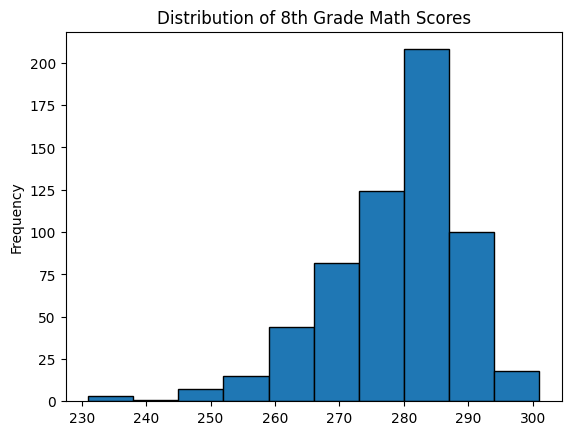

In [65]:
df.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")
#I notice that the majority of students have scored between 270 and 290.  The data is skewed to the left and has its two highest points at 290 and a little less than 280.

**<CAPTION FOR VIZ 1>**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

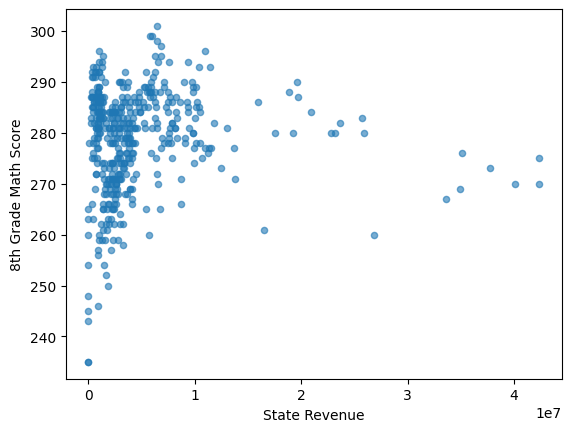

In [66]:
df.plot.scatter(x='STATE_REVENUE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('State Revenue')
plt.ylabel('8th Grade Math Score')
# Plotting the state revenue with the average math 8 score could reveal important information about how the revenues of a state could affect testing scores.  
# Seeing how the test score of states with higher revenue compare to those of lower revenue could be important in making decisions about future educational resource allocation in certain places.

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [110]:
from sklearn.model_selection import train_test_split

In [114]:
X = df[['STATE_REVENUE','AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [116]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [117]:
# create your model here
model = LinearRegression()

In [118]:
model.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [120]:
print(model.intercept_)
print(model.coef_)
model.score(X_test, y_test)

-30.81582084751375
[9.39063716e-09 7.36740617e-01 5.15543540e-01]


0.9223212406932457

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

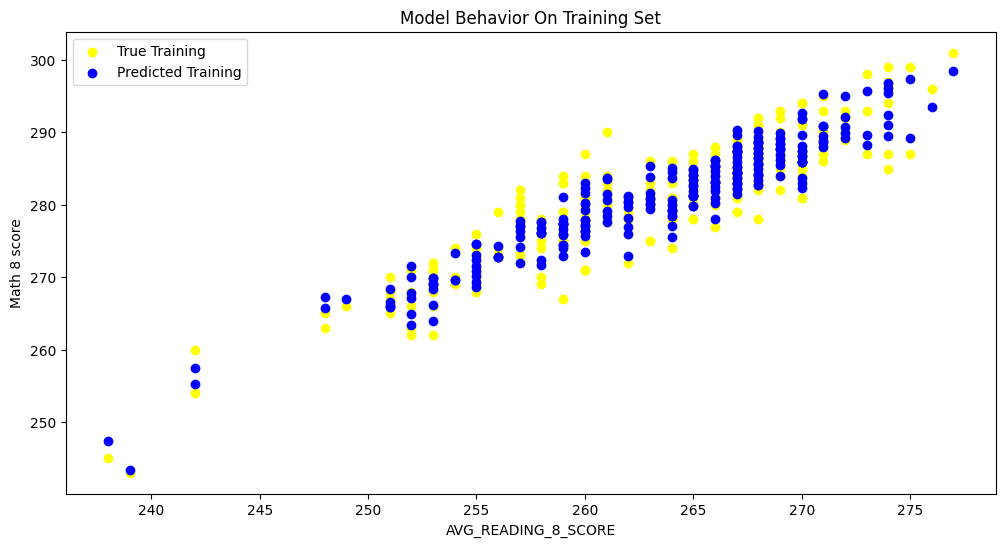

In [121]:
#col_name = 'AVG_READING_8_SCORE'

#f = plt.figure(figsize=(12,6))
#plt.scatter(X_train[col_name], y_train, color = "red")
#plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

#plt.legend(['True Training','Predicted Training'])
#plt.xlabel(col_name)
#plt.ylabel('Math 8 score')
#plt.title("Model Behavior On Training Set")

col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "yellow")
plt.scatter(X_train[col_name], model.predict(X_train), color = "blue")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

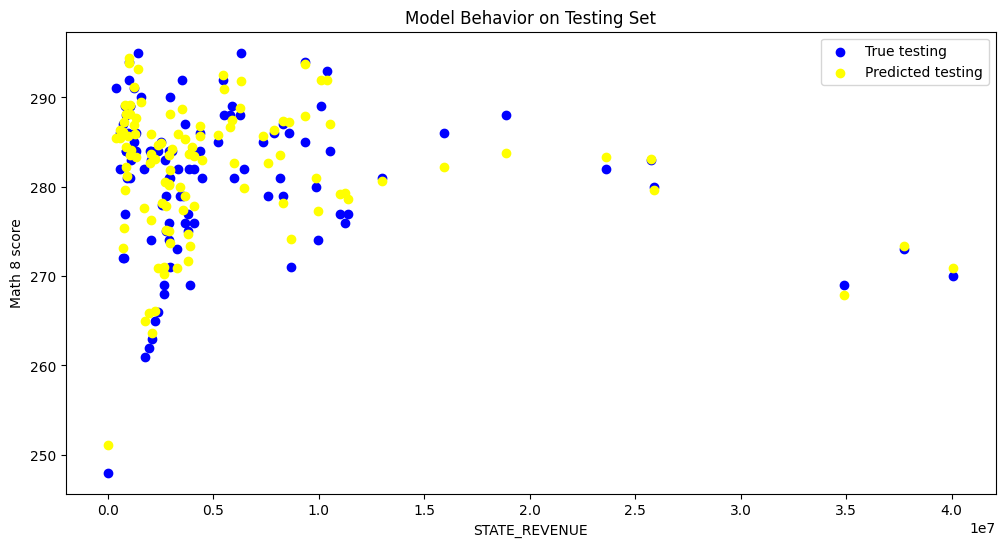

In [123]:
col_name = 'STATE_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "yellow")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**
# My model was pretty good!  It had a model score of 0.9223212406932457, which is close to 1.  I chose the average math scores of 8th graders for the subject of my tests and chose state revenue, average reading scores of 8th graders, and average math scores of 4th graders as my comparisons.  The model comparing average reading scores showed they were similar to math 8 scores and that the model did not strongly underfit or overfit the data.  The model also worked well in comparing the state revenue, as the true testing and predicted testing dots were both clustered around the same area and outliers coincided with each other in both sets.  